In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
S0 = 1.0  # Prezzo iniziale del sottostante
K = 1.0  # Prezzo del
T = 2.0  # Tiempo hasta el vencimiento
r = 0.001  # Tasa libre de riesgo
sigma = 0.4  # Volatilidad
S_max = 3 * S0  # Extremo superior del rango de precios del subyacente

# Modello di Black-Scholes per Opzioni Digitali

Il modello di Black-Scholes è uno dei modelli più conosciuti per la valutazione dei prezzi delle opzioni europee. L'equazione differenziale parziale (EDP) di Black-Scholes per un'opzione senza pagamenti di dividendi è data da:

$$
\frac{\partial V}{\partial t} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} + rS\frac{\partial V}{\partial S} - rV = 0
$$

dove:
- $V$ è il prezzo dell'opzione,
- $S$ è il prezzo dell'attivo sottostante,
- $t$ è il tempo fino alla scadenza,
- $\sigma$ è la volatilità dell'attivo sottostante,
- $r$ è il tasso di interesse privo di rischio.


# Algoritmo di Crank-Nicolson

L'algoritmo di Crank-Nicolson è un metodo numerico per risolvere l'EDP di Black-Scholes. È un esempio di schema a differenze finite ed è noto per la sua stabilità e precisione. L'algoritmo utilizza una media tra lo schema esplicito e quello implicito di Eulero, risultando in uno schema numerico di tipo semi-implicito.

L'aggiornamento del prezzo dell'opzione dall'istante $t$ all'istante $t+\Delta t$ è dato da:

$$
A V^{n+1} = B V^n + \text{condizioni al bordo}
$$

dove $A$ e $B$ sono matrici che incorporano i coefficienti delle differenze finite basati sull'EDP di Black-Scholes. $V^n$ è il vettore che rappresenta i prezzi dell'opzione al tempo $t$ e $V^{n+1}$ al tempo $t + \Delta t$.


# Costruzione delle Matrici A e B

Le matrici $A$ e $B$ sono costruite come segue:

- Elementi di $A$:
  - $A_{i, i-1} = -\frac{1}{4} \Delta t (\sigma^2 i^2 - r i)$
  - $A_{i, i} = 1 + \frac{1}{2} \Delta t (\sigma^2 i^2 + r)$
  - $A_{i, i+1} = -\frac{1}{4} \Delta t (\sigma^2 i^2 + r i)$

- Elementi di $B$:
  - $B_{i, i-1} = \frac{1}{4} \Delta t (\sigma^2 i^2 - r i)$
  - $B_{i, i} = 1 - \frac{1}{2} \Delta t (\sigma^2 i^2 + r)$
  - $B_{i, i+1} = \frac{1}{4} \Delta t (\sigma^2 i^2 + r i)$

Queste matrici sono poi utilizzate per calcolare il prezzo dell'opzione a ogni passo temporale, risolvendo il sistema lineare per ottenere $V^{n+1}$ da $V^n$.


# Condizioni al Contorno

Le condizioni al contorno sono essenziali per la corretta implementazione dell'algoritmo di Crank-Nicolson. Nel nostro caso, per un'opzione digitale, le condizioni al contorno riflettono il payoff dell'opzione al vencimiento, che è 1 se $S < K$ e 0 altrimenti.

Le condizioni al contorno per i bordi della griglia computazionale sono impostate come segue:
- Per $S=0$, il prezzo dell'opzione è sempre 0, poiché il sottostante non ha valore.
- Per $S$ molto grande, il prezzo dell'opzione tende a 0 per un'opzione di vendita digitale, poiché la probabilità che il sottostante sia sotto il prezzo di esercizio è trascurabile.

Queste condizioni sono implementate nel codice Python attraverso l'aggiornamento dei vettori prima della risoluzione del sistema lineare ad ogni passo temporale.


---

Questa funzione `calcular_precio_opcion_digital` calcola il prezzo di un'opzione digitale utilizzando il metodo di Crank-Nicolson per risolvere l'equazione differenziale parziale di Black-Scholes. `M` rappresenta il numero di passi temporali, mentre `N` indica il numero di passi spaziali nella discretizzazione del modello.

$$ \frac{V_i^{n+1} - V_i^n}{\Delta t} = \frac{1}{2} \left[ \mathcal{L}(V_i^{n+1}) + \mathcal{L}(V_i^n) \right] $$

# Implementazione in Python dell'Algoritmo di Crank-Nicolson

L'implementazione in Python dell'algoritmo di Crank-Nicolson utilizza le matrici $A$ e $B$ per calcolare i prezzi dell'opzione a ogni passo temporale. Il codice costruisce queste matrici basandosi sulle dimensioni della griglia di discretizzazione sia nel tempo ($M$) che nello spazio ($N$). 

Per risolvere il sistema lineare ad ogni passo temporale all'indietro (dal tempo finale al tempo iniziale), utilizziamo la funzione `numpy.linalg.solve`, che trova la soluzione del sistema lineare $Ax = B$.

Infine, utilizziamo la funzione `numpy.interp` per interpolare i risultati della griglia discretizzata e ottenere un'approssimazione del prezzo dell'opzione al prezzo del sottostante corrente $S_0$.


In [3]:
# Función para calcular el precio de la opción digital
def calcular_precio_opcion_digital(M, N):
    dt = T / M
    dS = S_max / N
    S = np.linspace(0, S_max, N+1)

    A = np.zeros((N+1, N+1))
    B = np.zeros((N+1, N+1))
    V = np.where(S <= K, 1, 0)

    for i in range(1, N):
        a = 0.25 * dt * (sigma**2 * i**2 - r * i)
        b = -0.5 * dt * (sigma**2 * i**2 + r)
        c = 0.25 * dt * (sigma**2 * i**2 + r * i)

        A[i, i-1] = -a
        A[i, i] = 1 - b
        A[i, i+1] = -c

        B[i, i-1] = a
        B[i, i] = 1 + b
        B[i, i+1] = c

    A[0, 0] = A[N, N] = 1
    B[0, 0] = B[N, N] = 1

    for j in range(M):
        V = np.linalg.solve(A, B.dot(V))
        V[0] = 1
        V[N] = 0

    # usiamo la funzione np.interp per interpolare il prezzo dell'opzione al prezzo iniziale del sottostante S0.
    return np.interp(S0, S, V)

In questa sezione del codice, eseguiamo la funzione di calcolo del prezzo per una serie di valori di `M` e `N`. Questo ci permette di osservare come il prezzo dell'opzione varia al cambiare della risoluzione della griglia temporale e spaziale e di verificare la convergenza del modello.


# Convergenza dell'Algoritmo

L'algoritmo di Crank-N
icolson è noto per la sua convergenza e stabilità, soprattutto se confrontato con metodi puramente espliciti o impliciti. La convergenza dell'algoritmo è garantita sotto certe condizioni, che nel contesto delle EDP finanziarie sono generalmente soddisfatte se si utilizzano passi di discretizzazione adeguati nel tempo ($\Delta t$) e nello spazio ($\Delta S$).

In [4]:
# Datos para la simulación
M_values = [50, 100, 200]
N_values = [100, 200, 400]
# M_values = [4000]
# N_values = [50, 200, 400, 800, 1600]
precios = []

# Calcular precios y almacenar resultados
for M in M_values:
    for N in N_values:
        precio = calcular_precio_opcion_digital(M, N)
        precios.append((M, N, precio))
        print(f"Para M={M}, N={N}, el precio de la opción digital es: {precio}")

Para M=50, N=100, el precio de la opción digital es: 0.6121260410388296
Para M=50, N=200, el precio de la opción digital es: 0.6055989539593429
Para M=50, N=400, el precio de la opción digital es: 0.6398333896472886
Para M=100, N=100, el precio de la opción digital es: 0.612125388074681
Para M=100, N=200, el precio de la opción digital es: 0.6070372671660185
Para M=100, N=400, el precio de la opción digital es: 0.6108509466037528
Para M=200, N=100, el precio de la opción digital es: 0.6121252269526488
Para M=200, N=200, el precio de la opción digital es: 0.6070370659598373
Para M=200, N=400, el precio de la opción digital es: 0.6095708925339501


In [5]:
# Preparar datos para gráficos
precios_por_M = {M: [] for M in M_values}
for precio in precios:
    M, N, precio_opcion = precio
    precios_por_M[M].append(precio_opcion)

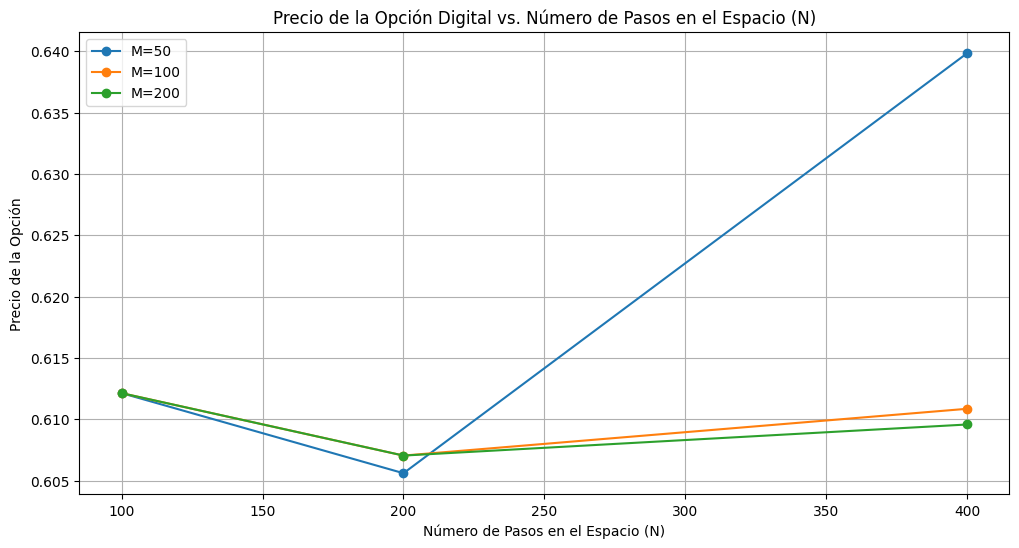

In [6]:
# Gráfico de precios de la opción vs. número de pasos en el espacio (N)
plt.figure(figsize=(12, 6))
for M, precios in precios_por_M.items():
    plt.plot(N_values, precios, marker='o', label=f'M={M}')
plt.title('Precio de la Opción Digital vs. Número de Pasos en el Espacio (N)')
plt.xlabel('Número de Pasos en el Espacio (N)')
plt.ylabel('Precio de la Opción')
plt.legend()
plt.grid(True)
plt.show()

# Condizioni al Bordo e Payoff Iniziale

Per applicare l'algoritmo di Crank-Nicolson, dobbiamo definire le condizioni al bordo per il prezzo dell'opzione. Per un'opzione digitale, il payoff alla scadenza è una funzione step, che paga 1 se il prezzo del sottostante è inferiore al prezzo di esercizio, e 0 altrimenti. Questo si riflette nel vettore dei prezzi iniziali $V^T$ al tempo di maturità.

Inoltre, le condizioni al bordo per $S = 0$ e $S \rightarrow \infty$ devono essere considerate:

- Per $S = 0$, il valore dell'opzione sarà sempre 0.
- Per $S \rightarrow \infty$, il valore dell'opzione sarà 0 per un'opzione di tipo put digitale e 1 per un'opzione di tipo call digitale.

Queste condizioni sono incorporate nel sistema risolvendo $A V^{n+1} = B V^n$ per ogni passo temporale fino a raggiungere $t = 0$.


# Iterazione nel Tempo e Risoluzione del Sistema Lineare

Con le matrici $A$ e $B$ e il vettore iniziale $V^T$, iteriamo all'indietro nel tempo per trovare i prezzi dell'opzione a ogni passo temporale. A ogni iterazione, risolviamo il sistema lineare:

$$
A V^{n+1} = B V^n
$$

dove $V^n$ è il vettore dei prezzi dell'opzione noti al tempo $t$ e $V^{n+1}$ è il vettore dei prezzi che vogliamo calcolare per il tempo precedente $t - \Delta t$. Utilizzando la funzione `np.linalg.solve` di NumPy, possiamo risolvere efficientemente questo sistema lineare.

Al termine delle iterazioni, interpoliamo i valori calcolati per trovare il prezzo dell'opzione al prezzo iniziale del sottostante $S_0$.


---

# Algoritmo di Eulero Implicito

L'algoritmo di Eulero implicito è un metodo numerico per la risoluzione di equazioni differenziali parziali che utilizza valori al tempo futuro per garantire la stabilità del metodo. La formulazione per il metodo di Eulero implicito è data da:

$$
\frac{V^{n+1} - V^n}{\Delta t} = \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V^{n+1}}{\partial S^2} + rS\frac{\partial V^{n+1}}{\partial S} - rV^{n+1}
$$

La matrice per l'algoritmo di Eulero implicito può essere scritta come:

$$
(I - \Delta t \cdot L)V^{n+1} = V^n
$$

dove $L$ è l'operatore differenziale che include i termini di derivate seconde e prime rispetto a $S$ e il termine di deriva zero (termine senza derivata).


In [7]:
def eulero_implicito_put_corretto(S0, K, T, r, sigma, M, N):
    dt = T / M
    dS = S_max / N
    S = np.linspace(0, S_max, N + 1)
    V = np.where(S < K, 1, 0)  # Payoff corretto per un'opzione put digitale
    
    # Inizializzazione della matrice tridiagonale per l'algoritmo di Eulero implicito
    A = np.zeros((N+1, N+1))
    for i in range(1, N):
        A[i, i-1] = 0.5 * dt * (r * i - sigma**2 * i**2)
        A[i, i] = 1 + dt * (sigma**2 * i**2 + r)
        A[i, i+1] = -0.5 * dt * (sigma**2 * i**2 + r * i)
    
    # Condizioni al contorno
    A[0, 0] = 1
    A[N, N] = 1
    V[0] = 1  # Il prezzo dell'opzione è 1 se S=0, assumendo che S<K
    V[N] = 0  # Il prezzo dell'opzione è 0 se S è molto grande
    
    # Loop temporale attraverso i passi di Eulero implicito
    for j in range(M):
        V = np.linalg.solve(A, V)
    
    # Interpolazione per trovare il valore al prezzo iniziale S0
    return np.interp(S0, S, V)

# Calcolo del prezzo dell'opzione digitale con il metodo di Eulero implicito corretto
prezzo_opzione_eulero_corretto = eulero_implicito_put_corretto(S0, K, T, r, sigma, M, N)
print("Prezzo dell'opzione digitale con Eulero Implicito (corretto):", prezzo_opzione_eulero_corretto)


Prezzo dell'opzione digitale con Eulero Implicito (corretto): 0.6094933851183658


---

In [8]:
def black_scholes_put_digitale(S0, K, T, r, sigma):
    d2 = (np.log(S0 / K) + (r - 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    prezzo_put_digitale = np.exp(-r * T) * norm.cdf(-d2)
    return prezzo_put_digitale

# Calcolo del prezzo dell'opzione put digitale
prezzo_put_digitale_BS = black_scholes_put_digitale(S0, K, T, r, sigma)
print("Prezzo dell'opzione put digitale (Black-Scholes):", prezzo_put_digitale_BS)


Prezzo dell'opzione put digitale (Black-Scholes): 0.6087766794122874
